<a href="https://colab.research.google.com/github/nsk20/CMPE257-Fall23-ShyamKumar-Nalluri/blob/class-activities/Class_Activity1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('synthetic_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      50 non-null     float64
 1   x2      50 non-null     float64
 2   y       50 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 1.3 KB


In [3]:
df['x0'] = 1
cols = ['x0', 'x1', 'x2' , 'y']
df = df[cols]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      50 non-null     int64  
 1   x1      50 non-null     float64
 2   x2      50 non-null     float64
 3   y       50 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


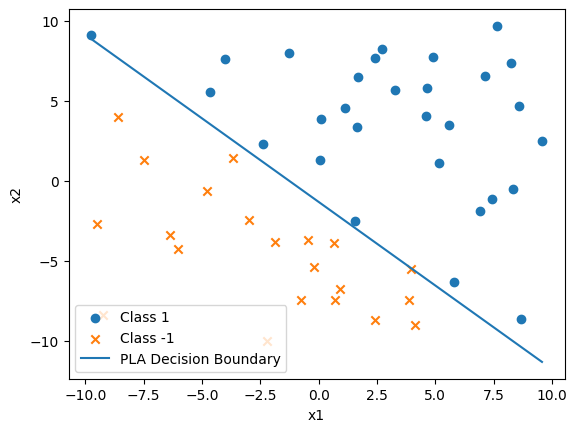

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('synthetic_dataset.csv')

# Add a bias term (x0)
df['x0'] = 1

# Select relevant columns
cols = ['x0', 'x1', 'x2', 'y']
df = df[cols]

# Extract features (X) and labels (y)
X = df[['x0', 'x1', 'x2']].values
y = df['y'].values

# Initialize weights
weights = np.zeros(3)

# Define the number of iterations (you can adjust this)
max_iterations = 1000

# Define the learning rate (you can adjust this)
learning_rate = 1.0

# PLA Algorithm
for iteration in range(max_iterations):
    misclassified = 0
    for i in range(len(X)):
        if np.dot(X[i], weights) * y[i] <= 0:
            weights += learning_rate * X[i] * y[i]
            misclassified += 1
    if misclassified == 0:
        break

# Plot the dataset
plt.scatter(df['x1'][df['y'] == 1], df['x2'][df['y'] == 1], label='Class 1', marker='o')
plt.scatter(df['x1'][df['y'] == -1], df['x2'][df['y'] == -1], label='Class -1', marker='x')

# Plot the decision boundary for PLA
x_pla = np.linspace(df['x1'].min(), df['x1'].max(), 100)
y_pla = (-weights[0] - weights[1] * x_pla) / weights[2]
plt.plot(x_pla, y_pla, label='PLA Decision Boundary', linestyle='-')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()


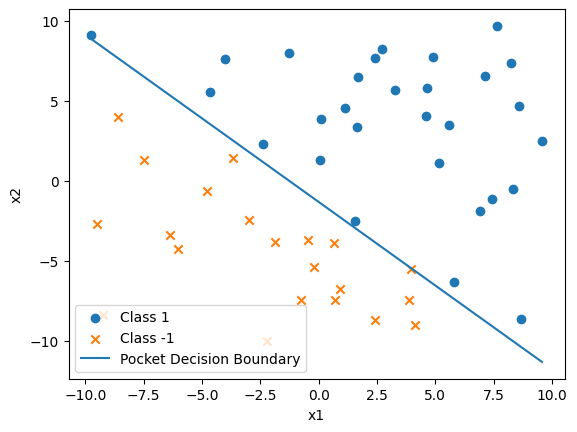

In [6]:


# Initialize weights
weights = np.zeros(3)

# Define the number of iterations (you can adjust this)
max_iterations = 1000

# Define the learning rate (you can adjust this)
learning_rate = 1.0

# Pocket Algorithm
best_weights = weights
for iteration in range(max_iterations):
    misclassified = 0
    for i in range(len(X)):
        if np.dot(X[i], weights) * y[i] <= 0:
            weights += learning_rate * X[i] * y[i]
            misclassified += 1
    if misclassified == 0:
        break

    if np.all(np.dot(X, weights) * y > np.dot(X, best_weights) * y):
        best_weights = weights

# Plot the dataset
plt.scatter(df['x1'][df['y'] == 1], df['x2'][df['y'] == 1], label='Class 1', marker='o')
plt.scatter(df['x1'][df['y'] == -1], df['x2'][df['y'] == -1], label='Class -1', marker='x')

# Plot the decision boundary for Pocket Algorithm
x_pocket = np.linspace(df['x1'].min(), df['x1'].max(), 100)
y_pocket = (-best_weights[0] - best_weights[1] * x_pocket) / best_weights[2]
plt.plot(x_pocket, y_pocket, label='Pocket Decision Boundary', linestyle='-')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()